# 1. Data understanding and exploration

## 1.1. Importing libraries and configuring settings

In [2261]:
# libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

# settings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## 1.2. Loading data

In [2262]:
# loading data
leads = pd.read_csv('leads.csv')

## 1.3. Exploring data

In [2263]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [2264]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [2265]:
leads.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# 2. Data preprocessing and Feature engineering

Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.

In [2266]:
leads = leads.replace('Select', np.nan)

## 2.1. Handle missing data

In [2267]:
# Define functions
def get_missing_data(dataframe):
    missing_data = pd.DataFrame(dataframe.isnull().sum(), columns=['Missing_Values'])
    missing_data['Percentage'] = round((missing_data['Missing_Values'] / len(dataframe))*100,2)
    missing_data = missing_data[missing_data['Percentage'] > 0]
    missing_data.sort_values('Percentage', ascending=False, inplace=True)
    return missing_data

def print_missing_data(dataframe):
    missing_data = get_missing_data(dataframe)
    print(missing_data)

def print_value_counts_normalized(dataframe, column):
    print(round(dataframe[column].value_counts(normalize=True)*100,2))
    print('\n')

def drop_columns(dataframe, columns):
    dataframe.drop(labels=columns, axis=1, inplace=True)

In [2268]:
# Print columns have missing data
print_missing_data(leads)

                                               Missing_Values  Percentage
How did you hear about X Education                       7250       78.46
Lead Profile                                             6855       74.19
Lead Quality                                             4767       51.59
Asymmetrique Profile Score                               4218       45.65
Asymmetrique Activity Score                              4218       45.65
Asymmetrique Profile Index                               4218       45.65
Asymmetrique Activity Index                              4218       45.65
City                                                     3669       39.71
Specialization                                           3380       36.58
Tags                                                     3353       36.29
What matters most to you in choosing a course            2709       29.32
What is your current occupation                          2690       29.11
Country                               

In [2269]:
# Drop columns with missing percentage over 40%
missing_leads = get_missing_data(leads)
leads_removing_columns = missing_leads[missing_leads['Percentage'] >= 40].index.to_list()
leads.drop(labels=leads_removing_columns, axis=1, inplace=True)
print_missing_data(leads)

                                               Missing_Values  Percentage
City                                                     3669       39.71
Specialization                                           3380       36.58
Tags                                                     3353       36.29
What matters most to you in choosing a course            2709       29.32
What is your current occupation                          2690       29.11
Country                                                  2461       26.63
TotalVisits                                               137        1.48
Page Views Per Visit                                      137        1.48
Last Activity                                             103        1.11
Lead Source                                                36        0.39


### 2.1.1. Column 'City'

In [2270]:
print('Before:')
print_value_counts_normalized(leads, 'City')

# 57.84% of data is 'Mumbai', so We will impute the missing data with 'Mumbai' 
leads['City'] = leads['City'].replace(np.nan,'Mumbai')

print('After:')
print_value_counts_normalized(leads, 'City')

Before:
Mumbai                         57.84
Thane & Outskirts              13.50
Other Cities                   12.31
Other Cities of Maharashtra     8.20
Other Metro Cities              6.82
Tier II Cities                  1.33
Name: City, dtype: float64


After:
Mumbai                         74.58
Thane & Outskirts               8.14
Other Cities                    7.42
Other Cities of Maharashtra     4.95
Other Metro Cities              4.11
Tier II Cities                  0.80
Name: City, dtype: float64




### 2.1.2. Column 'Specialization'

In [2271]:
print('Before:')
print_value_counts_normalized(leads, 'Specialization')

# 36.58% of data is missing data, which is the largest percentage.
# We will impute the missing data with new category 'Not Specified'
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not Specified')

print('After:')
print_value_counts_normalized(leads, 'Specialization')

Before:
Finance Management                   16.66
Human Resource Management            14.47
Marketing Management                 14.30
Operations Management                 8.58
Business Administration               6.88
IT Projects Management                6.25
Supply Chain Management               5.96
Banking, Investment And Insurance     5.77
Travel and Tourism                    3.46
Media and Advertising                 3.46
International Business                3.04
Healthcare Management                 2.71
Hospitality Management                1.95
E-COMMERCE                            1.91
Retail Management                     1.71
Rural and Agribusiness                1.25
E-Business                            0.97
Services Excellence                   0.68
Name: Specialization, dtype: float64


After:
Not Specified                        36.58
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07


### 2.1.3. Column 'Tags'

In [2272]:
print('Before:')
print_value_counts_normalized(leads, 'Tags')

# 36.29% of data is missing data, which is the largest percentage.
# We will impute the missing data with new category 'Not Specified'
leads['Tags'] = leads['Tags'].replace(np.nan, 'Not Specified')

print('After:')
print_value_counts_normalized(leads, 'Tags')

Before:
Will revert after reading the email                  35.20
Ringing                                              20.43
Interested in other courses                           8.71
Already a student                                     7.90
Closed by Horizzon                                    6.08
switched off                                          4.08
Busy                                                  3.16
Lost to EINS                                          2.97
Not doing further education                           2.46
Interested  in full time MBA                          1.99
Graduation in progress                                1.89
invalid number                                        1.41
Diploma holder (Not Eligible)                         1.07
wrong number given                                    0.80
opp hangup                                            0.56
number not provided                                   0.46
in touch with EINS                              

### 2.1.4. Column 'What matters most to you in choosing a course'

In [2273]:
print('Before:')
print_value_counts_normalized(leads, 'What matters most to you in choosing a course')

# Over 99% data is 'Better Career Prospects'.
# We will drop this column.
drop_columns(leads, ['What matters most to you in choosing a course'])

Before:
Better Career Prospects      99.95
Flexibility & Convenience     0.03
Other                         0.02
Name: What matters most to you in choosing a course, dtype: float64




### 2.1.5. Column 'What is your current occupation'

In [2274]:
print('Before:')
print_value_counts_normalized(leads, 'What is your current occupation')

# 89.75% values of this column is 'Unemployed'.
# We will impute the missing data with 'Unemployed'
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan,'Unemployed')

print('After:')
print_value_counts_normalized(leads, 'What is your current occupation')

Before:
Unemployed              85.50
Working Professional    10.78
Student                  3.21
Other                    0.24
Housewife                0.15
Businessman              0.12
Name: What is your current occupation, dtype: float64


After:
Unemployed              89.72
Working Professional     7.64
Student                  2.27
Other                    0.17
Housewife                0.11
Businessman              0.09
Name: What is your current occupation, dtype: float64




### 2.1.6. Column 'Country'

In [2275]:
print('Before:')
print_value_counts_normalized(leads, 'Country')

# Over 95% data is 'India'.
# We will drop this column.
drop_columns(leads, ['Country'])

Before:
India                   95.77
United States            1.02
United Arab Emirates     0.78
Singapore                0.35
Saudi Arabia             0.31
United Kingdom           0.22
Australia                0.19
Qatar                    0.15
Hong Kong                0.10
Bahrain                  0.10
Oman                     0.09
France                   0.09
unknown                  0.07
South Africa             0.06
Nigeria                  0.06
Germany                  0.06
Kuwait                   0.06
Canada                   0.06
Sweden                   0.04
China                    0.03
Asia/Pacific Region      0.03
Uganda                   0.03
Bangladesh               0.03
Italy                    0.03
Belgium                  0.03
Netherlands              0.03
Ghana                    0.03
Philippines              0.03
Russia                   0.01
Switzerland              0.01
Vietnam                  0.01
Denmark                  0.01
Tanzania                 0.01
Li

### 2.1.7. Other columns

In [2276]:
# Other columns have missing data < 2%, so we will drop these rows.
# leads.dropna(inplace = True)
leads['TotalVisits'] = leads['TotalVisits'].fillna(leads['TotalVisits'].mode())
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].mode())
leads['Last Activity'] = leads['Last Activity'].fillna(leads['Last Activity'].mode())
leads['Lead Source'] = leads['Lead Source'].fillna(leads['Lead Source'].mode())

## 2.2. Analyse data

The target variable, in this case, is the column 'Converted' which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

In [2277]:
print('The lead conversion rate is', round(sum(leads['Converted'])/len(leads['Converted'].index)*100,2),'%')

The lead conversion rate is 38.54 %


In [2278]:
 # Define functions   
def visualize_column(dataframe, column, checkingColumn):
    sns.countplot(x = column, hue = checkingColumn, data = dataframe)
    plt.xticks(rotation = 90)
    
def show_outliers(dataframe, col):
    sns.boxplot(y=dataframe[col])
    plt.show()

def visualize_numerical_column(dataframe, column, checkingColumn):
    sns.boxplot(y = column, x = checkingColumn, data = dataframe)
    plt.xticks(rotation = 90)

In [2279]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9204 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9103 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9103 non-null   float64
 10  Last Activity                       

### 2.2.1. Column 'Lead Number'

In [2280]:
leads['Lead Number'][leads['Lead Number'].duplicated()]
# Remove this column as it is a unique column
drop_columns(leads, 'Lead Number')

### 2.2.2. Binary columns

In [2281]:
leads_binary_columns = ['Do Not Email','Do Not Call',
                          'Search',	'Magazine',	'Newspaper Article', 
                          'X Education Forums', 'Newspaper',
                          'Digital Advertisement', 'Through Recommendations',
                          'Receive More Updates About Our Courses',
                          'Update me on Supply Chain Content', 
                          'Get updates on DM Content',
                          'I agree to pay the amount through cheque',
                          'A free copy of Mastering The Interview']
for col in leads_binary_columns:
    print_value_counts_normalized(leads, col)

No     92.06
Yes     7.94
Name: Do Not Email, dtype: float64


No     99.98
Yes     0.02
Name: Do Not Call, dtype: float64


No     99.85
Yes     0.15
Name: Search, dtype: float64


No    100.0
Name: Magazine, dtype: float64


No     99.98
Yes     0.02
Name: Newspaper Article, dtype: float64


No     99.99
Yes     0.01
Name: X Education Forums, dtype: float64


No     99.99
Yes     0.01
Name: Newspaper, dtype: float64


No     99.96
Yes     0.04
Name: Digital Advertisement, dtype: float64


No     99.92
Yes     0.08
Name: Through Recommendations, dtype: float64


No    100.0
Name: Receive More Updates About Our Courses, dtype: float64


No    100.0
Name: Update me on Supply Chain Content, dtype: float64


No    100.0
Name: Get updates on DM Content, dtype: float64


No    100.0
Name: I agree to pay the amount through cheque, dtype: float64


No     68.74
Yes    31.26
Name: A free copy of Mastering The Interview, dtype: float64




In [2282]:
# Drop these columns because there are one value > 99%
drop_binary_columns = ['Do Not Call', 'Search', 'Magazine', 'Newspaper Article',
                        'X Education Forums', 'Newspaper', 'Digital Advertisement',
                        'Through Recommendations', 'Receive More Updates About Our Courses',
                        'Update me on Supply Chain Content', 'Get updates on DM Content',
                        'I agree to pay the amount through cheque']
drop_columns(leads, drop_binary_columns)

In [2283]:
leads_binary_columns = ['Do Not Email', 'A free copy of Mastering The Interview']
# Transform binary value to 1 and 0
for col in leads_binary_columns:
    leads[col] = leads[col].replace(['No'], 0)
    leads[col] = leads[col].replace(['Yes'], 1)

0    92.06
1     7.94
Name: Do Not Email, dtype: float64




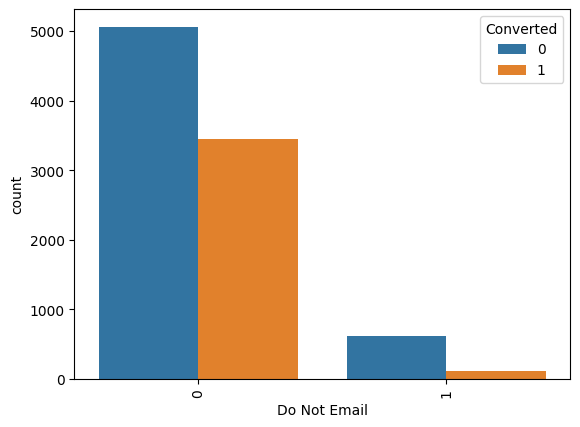

In [2284]:
print_value_counts_normalized(leads,'Do Not Email')
visualize_column(leads,'Do Not Email', 'Converted')

0    68.74
1    31.26
Name: A free copy of Mastering The Interview, dtype: float64




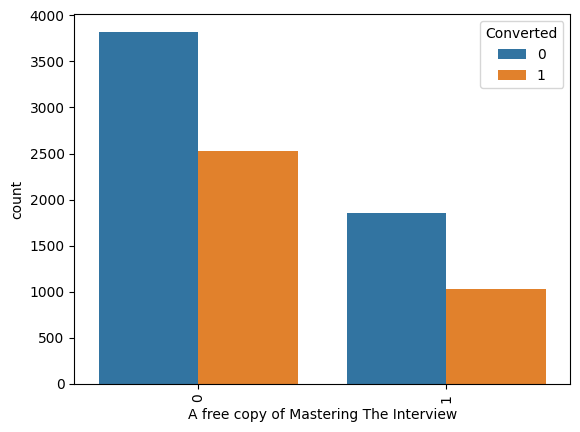

In [2285]:
print_value_counts_normalized(leads,'A free copy of Mastering The Interview')
visualize_column(leads,'A free copy of Mastering The Interview', 'Converted')

### 2.2.3. Numerical columns

#### 2.2.3.1. Column 'TotalVisits'

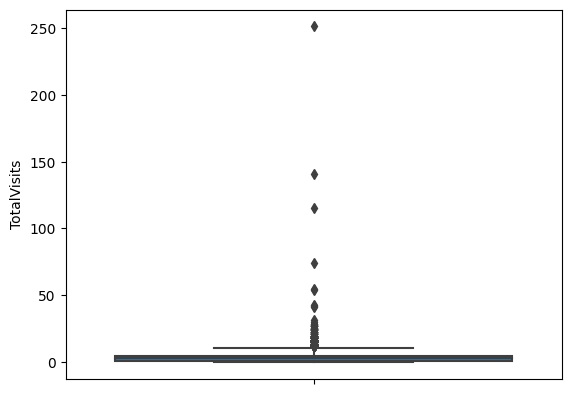

In [2286]:
show_outliers(leads, 'TotalVisits')

In [2287]:
leads['TotalVisits'].describe(percentiles=[0.01, 0.05, .25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
1%          0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

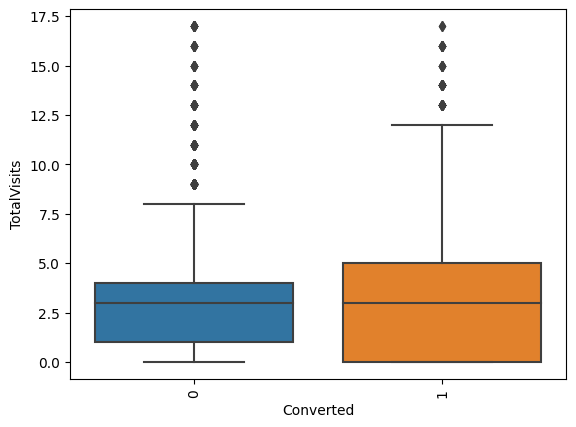

In [2288]:
# Remove top 1% outliers
leads = leads[(leads['TotalVisits'] <= leads['TotalVisits'].quantile(0.99))]
visualize_numerical_column(leads,'TotalVisits', 'Converted')

#### 2.2.3.2. Column 'Total Time Spent on Website'

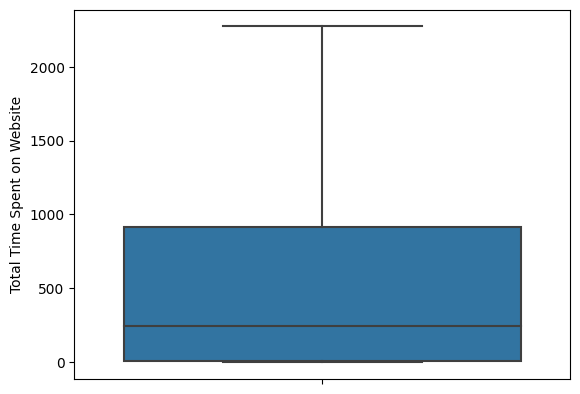

In [2289]:
show_outliers(leads, 'Total Time Spent on Website')

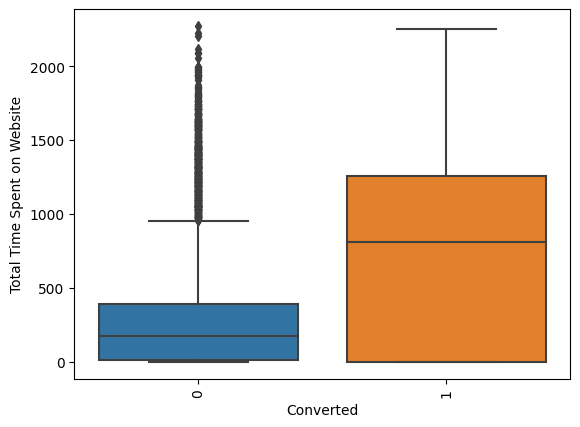

In [2290]:
visualize_numerical_column(leads,'Total Time Spent on Website', 'Converted')

#### 2.2.3.3. Column 'Page Views Per Visit'

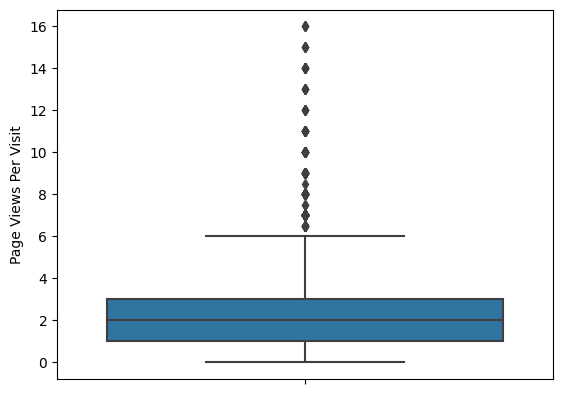

In [2291]:
show_outliers(leads, 'Page Views Per Visit')

In [2292]:
leads['Page Views Per Visit'].describe(percentiles=[0.01, 0.05, .25, .5, .75, .90, .95, .99])

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
1%          0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

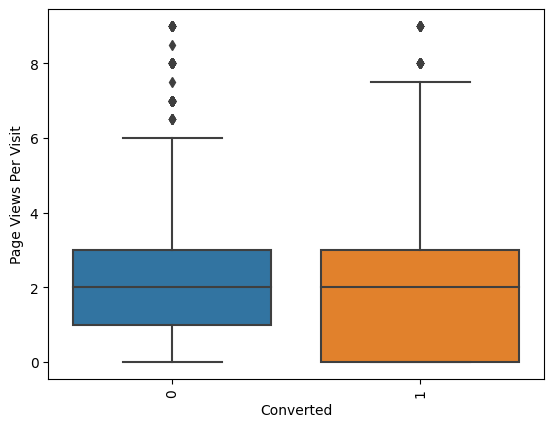

In [2293]:
# Remove top 1% outliers
leads = leads[(leads['Page Views Per Visit'] <= leads['Page Views Per Visit'].quantile(0.99))]
visualize_numerical_column(leads,'Page Views Per Visit', 'Converted')

### 2.2.4. Categorical columns

In [2294]:
# Convert to type category
leads_categorical_columns = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'Last Notable Activity']
leads[leads_categorical_columns] = leads[leads_categorical_columns].astype("category")

#### 2.2.4.1. Column 'Lead Origin'

Landing Page Submission    53.27
API                        39.61
Lead Add Form               6.78
Lead Import                 0.35
Name: Lead Origin, dtype: float64




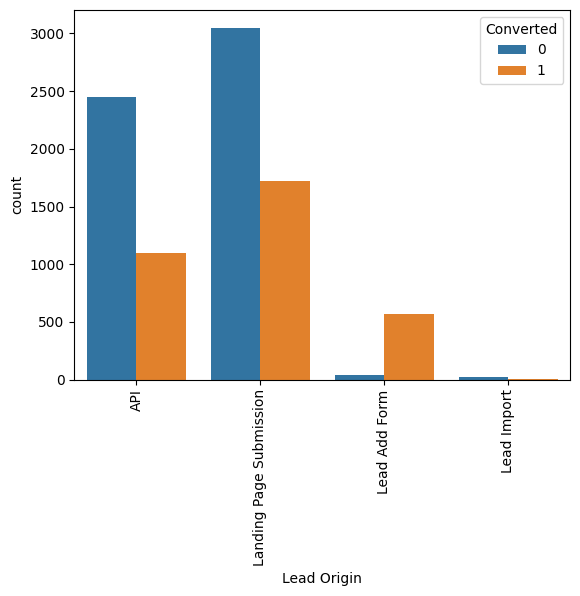

In [2295]:
print_value_counts_normalized(leads, 'Lead Origin')
visualize_column(leads, 'Lead Origin','Converted')

#### 2.2.4.2. Column 'Lead Source'

In [2296]:
print_value_counts_normalized(leads, 'Lead Source')

Google               31.78
Direct Traffic       28.00
Olark Chat           19.62
Organic Search       12.24
Reference             4.95
Welingak Website      1.45
Referral Sites        1.31
Facebook              0.35
bing                  0.07
google                0.06
Click2call            0.04
Social Media          0.02
Live Chat             0.02
Press_Release         0.01
WeLearn               0.01
Pay per Click Ads     0.01
NC_EDM                0.01
blog                  0.01
testone               0.01
welearnblog_Home      0.01
youtubechannel        0.01
Name: Lead Source, dtype: float64




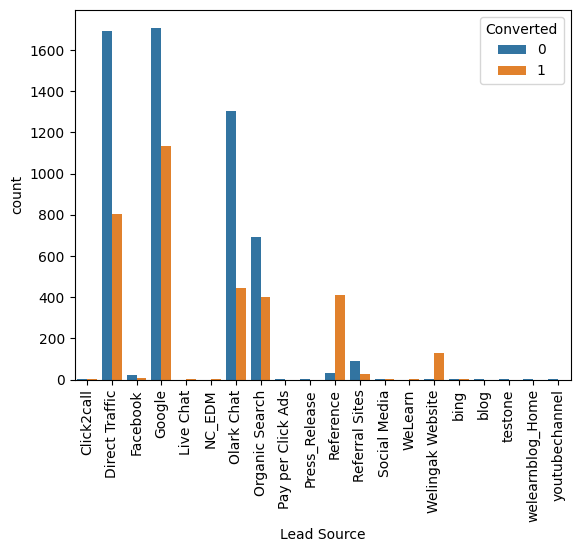

In [2297]:
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
visualize_column(leads, 'Lead Source','Converted')

#### 2.2.4.3. Column 'Last Activity'

Email Opened                    37.86
SMS Sent                        30.16
Olark Chat Conversation         10.79
Page Visited on Website          6.63
Converted to Lead                4.78
Email Bounced                    3.46
Email Link Clicked               2.95
Form Submitted on Website        1.27
Unreachable                      0.98
Unsubscribed                     0.67
Had a Phone Conversation         0.27
Approached upfront               0.06
View in browser link Clicked     0.04
Email Received                   0.02
Email Marked Spam                0.02
Resubscribed to emails           0.01
Visited Booth in Tradeshow       0.01
Name: Last Activity, dtype: float64




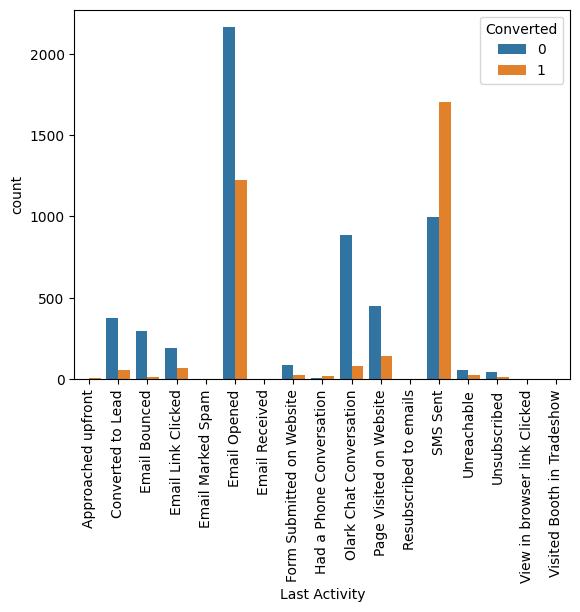

In [2298]:
print_value_counts_normalized(leads, 'Last Activity')
visualize_column(leads, 'Last Activity','Converted')

#### 2.2.4.4. Column 'Specialization'

Not Specified                        36.68
Finance Management                   10.56
Human Resource Management             9.16
Marketing Management                  9.10
Operations Management                 5.53
Business Administration               4.36
IT Projects Management                4.02
Supply Chain Management               3.78
Banking, Investment And Insurance     3.63
Media and Advertising                 2.20
Travel and Tourism                    2.11
International Business                1.91
Healthcare Management                 1.69
Hospitality Management                1.20
E-COMMERCE                            1.20
Retail Management                     1.06
Rural and Agribusiness                0.78
E-Business                            0.63
Services Excellence                   0.42
Name: Specialization, dtype: float64




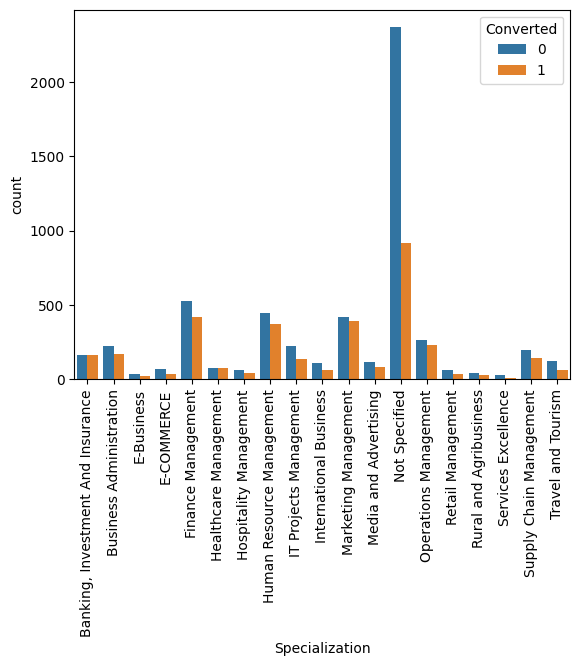

In [2299]:
print_value_counts_normalized(leads, 'Specialization')
visualize_column(leads, 'Specialization','Converted')

#### 2.2.4.5. Column 'What is your current occupation'

Unemployed              89.95
Working Professional     7.45
Student                  2.28
Other                    0.15
Housewife                0.10
Businessman              0.08
Name: What is your current occupation, dtype: float64




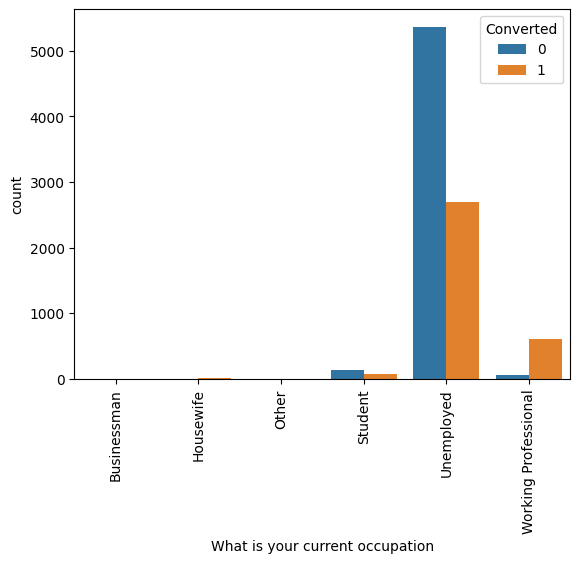

In [2300]:
print_value_counts_normalized(leads, 'What is your current occupation')
visualize_column(leads, 'What is your current occupation','Converted')

#### 2.2.4.6. Column 'Tags'

In [2301]:
print_value_counts_normalized(leads, 'Tags')
drop_columns(leads,'Tags')
# visualize_column(leads, 'Tags','Converted')

Not Specified                                        36.68
Will revert after reading the email                  22.36
Ringing                                              12.98
Interested in other courses                           5.64
Already a student                                     5.15
Closed by Horizzon                                    3.24
switched off                                          2.65
Busy                                                  2.04
Lost to EINS                                          1.89
Not doing further education                           1.53
Interested  in full time MBA                          1.30
Graduation in progress                                1.23
invalid number                                        0.90
Diploma holder (Not Eligible)                         0.70
wrong number given                                    0.51
opp hangup                                            0.37
number not provided                                   0.

#### 2.2.4.7. Column 'City'

Mumbai                         74.69
Thane & Outskirts               8.08
Other Cities                    7.47
Other Cities of Maharashtra     4.89
Other Metro Cities              4.07
Tier II Cities                  0.80
Name: City, dtype: float64




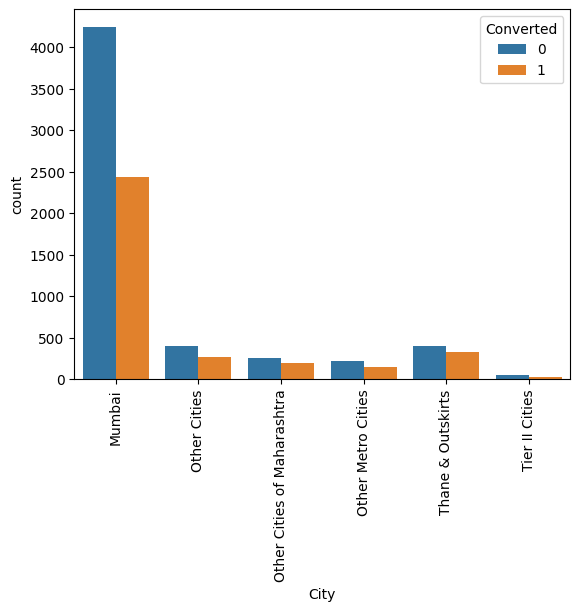

In [2302]:
print_value_counts_normalized(leads, 'City')
visualize_column(leads, 'City','Converted')

#### 2.2.4.8. Column 'Last Notable Activity'

Modified                        36.01
Email Opened                    31.15
SMS Sent                        23.94
Page Visited on Website          3.22
Olark Chat Conversation          2.03
Email Link Clicked               1.90
Email Bounced                    0.66
Unsubscribed                     0.51
Unreachable                      0.36
Had a Phone Conversation         0.15
Email Marked Spam                0.02
Approached upfront               0.01
Email Received                   0.01
Form Submitted on Website        0.01
Resubscribed to emails           0.01
View in browser link Clicked     0.01
Name: Last Notable Activity, dtype: float64




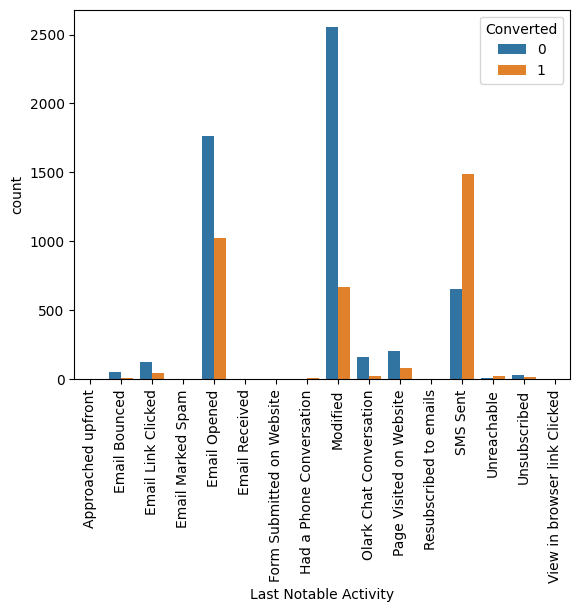

In [2303]:
print_value_counts_normalized(leads, 'Last Notable Activity')
visualize_column(leads, 'Last Notable Activity','Converted')

#### 2.2.4.9. Creating dummy variables

In [2304]:
leads_categorical_columns = leads.select_dtypes(include=['category']).columns.values
dummy_leads = pd.get_dummies(leads[leads_categorical_columns])
leads = pd.concat([leads, dummy_leads], axis=1)
leads = leads.drop(leads_categorical_columns, axis = 1)
leads = leads.drop(['Specialization_Not Specified'], axis = 1)
leads.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

# 3. Model development

## 3.1. Splitting the data into train and test set.

In [2305]:
# Putting feature variable to X
X = leads.drop(['Prospect ID', 'Converted'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [2306]:
# Putting target variable to y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [2307]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## 3.2. Scaling the features

In [2308]:
leads_numerical_columns = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
scaler = StandardScaler()
X_train[leads_numerical_columns] = scaler.fit_transform(X_train[leads_numerical_columns])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
9196,0,0.668862,1.848117,1.455819,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4696,0,-0.030697,-0.037832,0.399961,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3274,0,0.319082,-0.642138,-0.127967,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2164,0,-0.380477,-0.154676,-0.127967,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1667,0,0.319082,1.258415,-0.481679,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0

## 3.3. Build model 1

In [2309]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select = 20)
rfe = rfe.fit(X_train, y_train)

In [2310]:
cols1 = X_train.columns[rfe.support_]
X_train_sm = sm.add_constant(X_train[cols1])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6246
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2585.7
Date:                Wed, 14 Jun 2023   Deviance:                       5171.4
Time:                        23:39:45   Pearson chi2:                 6.45e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3956
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7313      0.170      4.303      0.000       0.398       1.064
Do Not Email                                            -1.5069      0.179     -8.404      0.000      -1.858      -1.155
Total Time Spent on Website                              1.0863      0.040     27.081      0.000       1.008       1.165
Lead Origin_Lead Add Form                                3.0981      0.248     12.471      0.000       2.611       3.585
Lead Source_Direct Traffic                              -1.4230      0.115    -12.332      0.000      -1.649      -1.197
Lead Source_Google                                      -1.0149      0.110     -9.220      0.000      -1.231      -0.799
Lead Source_Organic Search                              -1.1476      0.135     -8.515      0.000      -1.412      -0.883
Lead Source_Referral Sites                              -1.3566      0.344     -3.939      0.000      -2.032      -0.682
Lead Source_Welingak Website                             2.2682      1.039      2.183      0.029       0.232       4.304
Last Activity_Approached upfront                        24.3822   3.44e+04      0.001      0.999   -6.75e+04    6.75e+04
Last Activity_Had a Phone Conversation                   2.5051      1.034      2.423      0.015       0.479       4.531
Last Activity_Olark Chat Conversation                   -1.1075      0.198     -5.601      0.000      -1.495      -0.720
Last Activity_SMS Sent                                   0.6416      0.140      4.589      0.000       0.368       0.916
What is your current occupation_Housewife               24.1341   2.98e+04      0.001      0.999   -5.83e+04    5.84e+04
What is your current occupation_Working Professional     2.7255      0.197     13.822      0.000       2.339       3.112
Last Notable Activity_Email Link Clicked                -1.3531      0.300     -4.508      0.000      -1.941      -0.765
Last Notable Activity_Email Opened                      -0.8132      0.161     -5.056      0.000      -1.128      -0.498
Last Notable Activity_Had a Phone Conversation          21.0349    2.4e+04      0.001      0.999   -4.71e+04    4.71e+04
Last Notable Activity_Modified                          -1.4290      0.134    -10.628      0.000      -1.693      -1.165
Last Notable Activity_Olark Chat Conversation           -1.7185      0.434     -3.961      0.000      -2.569      -0.868
Last Notable Activity_Page Visited on Website           -1.1346      0.254     -4.471      0.000      -1.632      -0.637
========================================================================================================================
"""

## 3.4. Build model 2

In [2311]:
cols2 = cols1.drop('Last Activity_Approached upfront')
X_train_sm = sm.add_constant(X_train[cols2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6247
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.4
Date:                Wed, 14 Jun 2023   Deviance:                       5180.9
Time:                        23:39:45   Pearson chi2:                 6.45e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3947
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7574      0.169      4.468      0.000       0.425       1.090
Do Not Email                                            -1.5155      0.179     -8.457      0.000      -1.867      -1.164
Total Time Spent on Website                              1.0869      0.040     27.110      0.000       1.008       1.165
Lead Origin_Lead Add Form                                3.0865      0.248     12.430      0.000       2.600       3.573
Lead Source_Direct Traffic                              -1.4339      0.115    -12.440      0.000      -1.660      -1.208
Lead Source_Google                                      -1.0273      0.110     -9.343      0.000      -1.243      -0.812
Lead Source_Organic Search                              -1.1539      0.135     -8.576      0.000      -1.418      -0.890
Lead Source_Referral Sites                              -1.3702      0.344     -3.980      0.000      -2.045      -0.695
Lead Source_Welingak Website                             2.2697      1.039      2.185      0.029       0.234       4.306
Last Activity_Had a Phone Conversation                   2.4899      1.035      2.406      0.016       0.462       4.518
Last Activity_Olark Chat Conversation                   -1.1293      0.197     -5.718      0.000      -1.516      -0.742
Last Activity_SMS Sent                                   0.6249      0.139      4.482      0.000       0.352       0.898
What is your current occupation_Housewife               23.1290   1.81e+04      0.001      0.999   -3.54e+04    3.54e+04
What is your current occupation_Working Professional     2.7221      0.197     13.810      0.000       2.336       3.108
Last Notable Activity_Email Link Clicked                -1.3724      0.300     -4.577      0.000      -1.960      -0.785
Last Notable Activity_Email Opened                      -0.8307      0.160     -5.178      0.000      -1.145      -0.516
Last Notable Activity_Had a Phone Conversation          20.0355   1.46e+04      0.001      0.999   -2.85e+04    2.86e+04
Last Notable Activity_Modified                          -1.4292      0.134    -10.644      0.000      -1.692      -1.166
Last Notable Activity_Olark Chat Conversation           -1.7189      0.434     -3.962      0.000      -2.569      -0.869
Last Notable Activity_Page Visited on Website           -1.1506      0.254     -4.537      0.000      -1.648      -0.654
========================================================================================================================
"""

## 3.5. Build model 3

In [2312]:
cols3 = cols2.drop('What is your current occupation_Housewife')
X_train_sm = sm.add_constant(X_train[cols3])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6248
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.8
Date:                Wed, 14 Jun 2023   Deviance:                       5189.7
Time:                        23:39:45   Pearson chi2:                 6.46e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3938
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7591      0.169      4.481      0.000       0.427       1.091
Do Not Email                                            -1.5191      0.179     -8.477      0.000      -1.870      -1.168
Total Time Spent on Website                              1.0856      0.040     27.108      0.000       1.007       1.164
Lead Origin_Lead Add Form                                3.1013      0.248     12.500      0.000       2.615       3.588
Lead Source_Direct Traffic                              -1.4322      0.115    -12.432      0.000      -1.658      -1.206
Lead Source_Google                                      -1.0234      0.110     -9.316      0.000      -1.239      -0.808
Lead Source_Organic Search                              -1.1405      0.134     -8.496      0.000      -1.404      -0.877
Lead Source_Referral Sites                              -1.3696      0.344     -3.980      0.000      -2.044      -0.695
Lead Source_Welingak Website                             2.2549      1.039      2.171      0.030       0.219       4.291
Last Activity_Had a Phone Conversation                   2.4806      1.035      2.396      0.017       0.452       4.509
Last Activity_Olark Chat Conversation                   -1.1340      0.197     -5.745      0.000      -1.521      -0.747
Last Activity_SMS Sent                                   0.6193      0.139      4.444      0.000       0.346       0.892
What is your current occupation_Working Professional     2.7184      0.197     13.793      0.000       2.332       3.105
Last Notable Activity_Email Link Clicked                -1.3774      0.300     -4.593      0.000      -1.965      -0.790
Last Notable Activity_Email Opened                      -0.8314      0.160     -5.186      0.000      -1.146      -0.517
Last Notable Activity_Had a Phone Conversation          20.0392   1.46e+04      0.001      0.999   -2.85e+04    2.86e+04
Last Notable Activity_Modified                          -1.4282      0.134    -10.639      0.000      -1.691      -1.165
Last Notable Activity_Olark Chat Conversation           -1.7169      0.434     -3.959      0.000      -2.567      -0.867
Last Notable Activity_Page Visited on Website           -1.1550      0.254     -4.556      0.000      -1.652      -0.658
========================================================================================================================
"""

## 3.6. Build model 4

In [2313]:
cols4 = cols3.drop('Last Notable Activity_Olark Chat Conversation')
X_train_sm = sm.add_constant(X_train[cols4])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6249
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2604.0
Date:                Wed, 14 Jun 2023   Deviance:                       5208.1
Time:                        23:39:45   Pearson chi2:                 6.59e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3920
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5637      0.161      3.499      0.000       0.248       0.879
Do Not Email                                            -1.4749      0.177     -8.325      0.000      -1.822      -1.128
Total Time Spent on Website                              1.0767      0.040     27.024      0.000       0.999       1.155
Lead Origin_Lead Add Form                                3.0860      0.248     12.453      0.000       2.600       3.572
Lead Source_Direct Traffic                              -1.4205      0.115    -12.366      0.000      -1.646      -1.195
Lead Source_Google                                      -1.0166      0.110     -9.279      0.000      -1.231      -0.802
Lead Source_Organic Search                              -1.1250      0.134     -8.413      0.000      -1.387      -0.863
Lead Source_Referral Sites                              -1.3510      0.344     -3.933      0.000      -2.024      -0.678
Lead Source_Welingak Website                             2.1848      1.035      2.110      0.035       0.155       4.214
Last Activity_Had a Phone Conversation                   2.4542      1.031      2.380      0.017       0.433       4.475
Last Activity_Olark Chat Conversation                   -1.5499      0.190     -8.161      0.000      -1.922      -1.178
Last Activity_SMS Sent                                   0.7635      0.133      5.724      0.000       0.502       1.025
What is your current occupation_Working Professional     2.7328      0.197     13.847      0.000       2.346       3.120
Last Notable Activity_Email Link Clicked                -1.1882      0.295     -4.023      0.000      -1.767      -0.609
Last Notable Activity_Email Opened                      -0.6423      0.152     -4.218      0.000      -0.941      -0.344
Last Notable Activity_Had a Phone Conversation          20.2480   1.46e+04      0.001      0.999   -2.86e+04    2.86e+04
Last Notable Activity_Modified                          -1.2250      0.123     -9.955      0.000      -1.466      -0.984
Last Notable Activity_Page Visited on Website           -0.9667      0.248     -3.894      0.000      -1.453      -0.480
========================================================================================================================
"""

## 3.7. Build model 5

In [2314]:
cols5 = cols4.drop('Last Notable Activity_Had a Phone Conversation')
X_train_sm = sm.add_constant(X_train[cols5])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6250
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2604.8
Date:                Wed, 14 Jun 2023   Deviance:                       5209.5
Time:                        23:39:45   Pearson chi2:                 6.59e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3919
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5712      0.161      3.550      0.000       0.256       0.887
Do Not Email                                            -1.4798      0.177     -8.355      0.000      -1.827      -1.133
Total Time Spent on Website                              1.0764      0.040     27.017      0.000       0.998       1.154
Lead Origin_Lead Add Form                                3.0863      0.248     12.453      0.000       2.601       3.572
Lead Source_Direct Traffic                              -1.4196      0.115    -12.359      0.000      -1.645      -1.194
Lead Source_Google                                      -1.0155      0.110     -9.268      0.000      -1.230      -0.801
Lead Source_Organic Search                              -1.1262      0.134     -8.419      0.000      -1.388      -0.864
Lead Source_Referral Sites                              -1.3539      0.344     -3.934      0.000      -2.028      -0.679
Lead Source_Welingak Website                             2.1856      1.035      2.111      0.035       0.156       4.215
Last Activity_Had a Phone Conversation                   3.0324      0.901      3.365      0.001       1.266       4.799
Last Activity_Olark Chat Conversation                   -1.5525      0.190     -8.173      0.000      -1.925      -1.180
Last Activity_SMS Sent                                   0.7574      0.133      5.683      0.000       0.496       1.019
What is your current occupation_Working Professional     2.7322      0.197     13.842      0.000       2.345       3.119
Last Notable Activity_Email Link Clicked                -1.1961      0.295     -4.051      0.000      -1.775      -0.617
Last Notable Activity_Email Opened                      -0.6502      0.152     -4.277      0.000      -0.948      -0.352
Last Notable Activity_Modified                          -1.2330      0.123    -10.040      0.000      -1.474      -0.992
Last Notable Activity_Page Visited on Website           -0.9744      0.248     -3.927      0.000      -1.461      -0.488
========================================================================================================================
"""

## 3.8. Build model 6

In [2315]:
cols6 = cols5.drop('Lead Source_Welingak Website')
X_train_sm = sm.add_constant(X_train[cols6])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2609.0
Date:                Wed, 14 Jun 2023   Deviance:                       5217.9
Time:                        23:39:45   Pearson chi2:                 6.72e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3911
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5669      0.161      3.527      0.000       0.252       0.882
Do Not Email                                            -1.4777      0.177     -8.357      0.000      -1.824      -1.131
Total Time Spent on Website                              1.0767      0.040     27.022      0.000       0.999       1.155
Lead Origin_Lead Add Form                                3.3940      0.239     14.203      0.000       2.926       3.862
Lead Source_Direct Traffic                              -1.4197      0.115    -12.359      0.000      -1.645      -1.195
Lead Source_Google                                      -1.0159      0.110     -9.271      0.000      -1.231      -0.801
Lead Source_Organic Search                              -1.1265      0.134     -8.421      0.000      -1.389      -0.864
Lead Source_Referral Sites                              -1.3534      0.344     -3.933      0.000      -2.028      -0.679
Last Activity_Had a Phone Conversation                   3.0331      0.902      3.364      0.001       1.266       4.800
Last Activity_Olark Chat Conversation                   -1.5453      0.190     -8.153      0.000      -1.917      -1.174
Last Activity_SMS Sent                                   0.7629      0.133      5.734      0.000       0.502       1.024
What is your current occupation_Working Professional     2.7265      0.198     13.796      0.000       2.339       3.114
Last Notable Activity_Email Link Clicked                -1.2008      0.296     -4.054      0.000      -1.781      -0.620
Last Notable Activity_Email Opened                      -0.6453      0.152     -4.250      0.000      -0.943      -0.348
Last Notable Activity_Modified                          -1.2310      0.123    -10.048      0.000      -1.471      -0.991
Last Notable Activity_Page Visited on Website           -0.9715      0.248     -3.915      0.000      -1.458      -0.485
========================================================================================================================
"""

## 3.9. Build model 7

In [2316]:
cols7 = cols6.drop('Last Activity_Had a Phone Conversation')
X_train_sm = sm.add_constant(X_train[cols7])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2617.1
Date:                Wed, 14 Jun 2023   Deviance:                       5234.2
Time:                        23:39:45   Pearson chi2:                 6.73e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3895
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6316      0.159      3.964      0.000       0.319       0.944
Do Not Email                                            -1.4990      0.177     -8.472      0.000      -1.846      -1.152
Total Time Spent on Website                              1.0754      0.040     27.050      0.000       0.997       1.153
Lead Origin_Lead Add Form                                3.4003      0.239     14.233      0.000       2.932       3.869
Lead Source_Direct Traffic                              -1.4130      0.115    -12.318      0.000      -1.638      -1.188
Lead Source_Google                                      -1.0088      0.109     -9.220      0.000      -1.223      -0.794
Lead Source_Organic Search                              -1.1082      0.133     -8.310      0.000      -1.370      -0.847
Lead Source_Referral Sites                              -1.3132      0.338     -3.890      0.000      -1.975      -0.652
Last Activity_Olark Chat Conversation                   -1.5913      0.189     -8.414      0.000      -1.962      -1.221
Last Activity_SMS Sent                                   0.6993      0.132      5.316      0.000       0.442       0.957
What is your current occupation_Working Professional     2.7277      0.197     13.829      0.000       2.341       3.114
Last Notable Activity_Email Link Clicked                -1.2713      0.295     -4.304      0.000      -1.850      -0.692
Last Notable Activity_Email Opened                      -0.7170      0.150     -4.776      0.000      -1.011      -0.423
Last Notable Activity_Modified                          -1.2664      0.122    -10.393      0.000      -1.505      -1.028
Last Notable Activity_Page Visited on Website           -1.0435      0.247     -4.223      0.000      -1.528      -0.559
========================================================================================================================
"""

## 3.10. Checking VIF

In [2317]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols7].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols7].values, i) for i in range(X_train[cols7].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Source_Google,2.65
3,Lead Source_Direct Traffic,2.48
12,Last Notable Activity_Modified,2.37
11,Last Notable Activity_Email Opened,2.32
8,Last Activity_SMS Sent,2.02
5,Lead Source_Organic Search,1.63
2,Lead Origin_Lead Add Form,1.40
7,Last Activity_Olark Chat Conversation,1.32
1,Total Time Spent on Website,1.30
13,Last Notable Activity_Page Visited on Website,1.16


*** NOTE:
Because the Pvalues of all variables is 0 and VIF values are low for all the variables, model 7 is the final model.



# 4. Model Evaluation

## 4.1. Predict the Train set

In [2318]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Prospect ID': y_train.index, 'Converted':y_train.values, 'Probability':y_train_pred})

# Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels
y_train_pred_final['Predicted'] = y_train_pred_final['Probability'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Prospect ID,Converted,Probability,Predicted
0,9196,1,0.909661,1
1,4696,0,0.469331,0
2,3274,0,0.408905,0
3,2164,0,0.032255,0
4,1667,1,0.564398,1


### 4.1.1. Get the metrics of prediction

In [2319]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'] )
print(confusion)

[[3439  443]
 [ 747 1638]]


In [2320]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy:', round(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted']),2))
print('Sensitivity:', round(TP / float(TP+FN),2))
print('Specificity:', round(TN / float(TN+FP),2))
print('False Positive Rate:', round(FP/ float(TN+FP),2))
print('Positive Predictive Value:', round(TP / float(TP+FP),2))
print ('Negative predictive value:', round(TN / float(TN+ FN),2))

Accuracy: 0.81
Sensitivity: 0.69
Specificity: 0.89
False Positive Rate: 0.11
Positive Predictive Value: 0.79
Negative predictive value: 0.82


*** NOTE:
- The Specificity was good (~89%) but the Sensitivity was 69%.
- The Sensitivity of 69% because of the cut-off point of 0.5.

### 4.1.2. Optimise the cut-off point

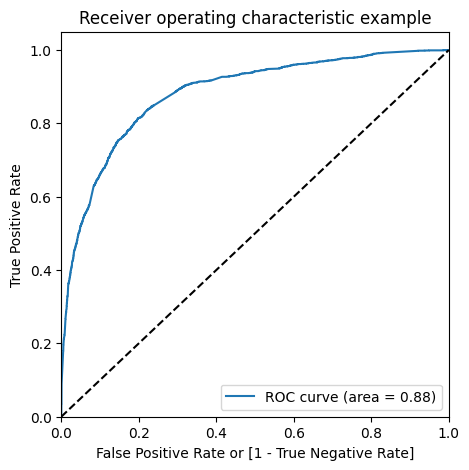

In [2321]:
# Plotting the ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Probability'], drop_intermediate = False )
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Probability'])

***Note: The model is a good becauase ROC curve area = 88%.

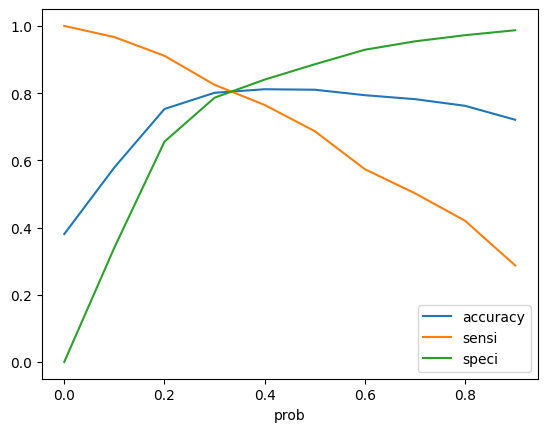

In [2322]:
# Find the optimum cut-off point
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Probability'].map(lambda x: 1 if x > i else 0)

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [2323]:
# 0.34 is the optimum cut-off point
y_train_pred_final['Final_Predicted'] = y_train_pred_final['Probability'].map( lambda x: 1 if x > 0.34 else 0)

### 4.1.3. Get the metrics of new prediction

In [2324]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Final_Predicted'])
confusion2

array([[3136,  746],
       [ 467, 1918]], dtype=int64)

In [2325]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
print('Accuracy:', round(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Final_Predicted']),2))
print('Sensitivity:',round(TP / float(TP+FN),2))
print('Specificity:',round(TN / float(TN+FP),2))
print('False Positive rate: ',round(FP/ float(TN+FP),2))
print('Positive Predictive Value:',round(TP / float(TP+FP),2))
print('Negative Predictive Value: ',round(TN / float(TN+ FN),2))

Accuracy: 0.81
Sensitivity: 0.8
Specificity: 0.81
False Positive rate:  0.19
Positive Predictive Value: 0.72
Negative Predictive Value:  0.87


### 4.1.4. Precision and Recall

In [2326]:
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'] )
confusion

array([[3439,  443],
       [ 747, 1638]], dtype=int64)

In [2327]:
print("Precision : ", round(confusion[1,1]/(confusion[0,1]+confusion[1,1]),2))
print("Recall :",round(confusion[1,1]/(confusion[1,0]+confusion[1,1]),2))

Precision :  0.79
Recall : 0.69


In [2328]:
print("Precision :", precision_score(y_train_pred_final['Converted'] , y_train_pred_final['Predicted']))
print("Recall :", recall_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted']))

Precision : 0.7871215761653051
Recall : 0.6867924528301886


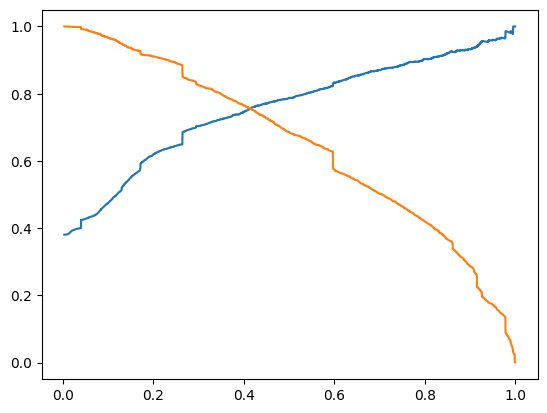

In [2329]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Probability'])
plt.plot(thresholds, p[:-1])
plt.plot(thresholds, r[:-1])
plt.show()

## 4.2. Predict the Test set

In [2330]:
# Scale the test data
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [2331]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[cols7]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website
7681,0,-0.304384,0,1,0,0,0,0,1,0,0,0,0,0
984,0,-0.538073,0,0,0,1,0,0,1,0,0,0,1,0
8135,1,0.794688,0,1,0,0,0,0,1,0,0,0,0,0
6915,0,-0.614753,0,0,1,0,0,0,0,0,0,1,0,0
2712,0,-0.412100,0,0,1,0,0,0,0,0,0,1,0,0


In [2332]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)

# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Probability'})

y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Probability'])

y_pred_final['Final_Predicted'] = y_pred_final['Probability'].map(lambda x: 1 if x > 0.34 else 0)
y_pred_final.head()

,Prospect ID,Converted,Probability,Final_Predicted
0,7681,0,0.399038,1
1,984,0,0.164885,0
2,8135,0,0.325953,0
3,6915,0,0.147373,0
4,2712,1,0.176910,0


In [2333]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['Final_Predicted'] )
confusion2

array([[1343,  333],
       [ 201,  809]], dtype=int64)

In [2334]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

print('Accuracy:',round(metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['Final_Predicted']),2))
print('Sensitivity:',round(TP / float(TP+FN),2))
print('Specificity:',round(TN / float(TN+FP),2))


Accuracy: 0.8
Sensitivity: 0.8
Specificity: 0.8


# 5. Result

## 5.1. Checking metrics of Train & Test data

- Train data:
    - Accuracy: 81%
    - Sensitivity: 80%
    - Specificity: 81%

- Test data:
    - Accuracy: 80%
    - Sensitivity: 80%
    - Specificity: 80%

The model can predict the Conversion Rate well to help making calls with a higher lead conversion rate of 80%

## 5.2. Important features

In [2335]:
res.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                               3.400313
What is your current occupation_Working Professional    2.727741
Total Time Spent on Website                             1.075391
Last Activity_SMS Sent                                  0.699316
const                                                   0.631569
Last Notable Activity_Email Opened                     -0.716998
Lead Source_Google                                     -1.008828
Last Notable Activity_Page Visited on Website          -1.043538
Lead Source_Organic Search                             -1.108188
Last Notable Activity_Modified                         -1.266376
Last Notable Activity_Email Link Clicked               -1.271288
Lead Source_Referral Sites                             -1.313236
Lead Source_Direct Traffic                             -1.413030
Do Not Email                                           -1.499000
Last Activity_Olark Chat Conversation                  -1.591337
dtype: float64

- We should make calls to the leads coming from:
    - Lead Origin: Lead Add Form
    - What is your current occupation: Working Professional
    - Longer total time spent on Website
    - Last Activity: SMS Sent

- We should not make calls to the leads coming from:
    - Last Notable Activity: Email Opened, Page Visited on Website, Modified, Email Link Clicked
    - Lead Source: Google, Organic Search, Referral Sites, Direct Traffic
    - Do Not Email: yes
    - Last Activity: Olark Chat Conversation

## 5.3. Find out the hot leads

In [2336]:
# Assign lead scoring
y_pred_final['Lead_Score'] = y_pred_final['Probability'].map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Probability,Final_Predicted,Lead_Score
0,7681,0,0.399038,1,40
1,984,0,0.164885,0,16
2,8135,0,0.325953,0,33
3,6915,0,0.147373,0,15
4,2712,1,0.176910,0,18


In [2337]:
# There are 321 hot leads with score >= 90
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=90]
hot_leads.describe()

,Prospect ID,Converted,Probability,Final_Predicted,Lead_Score
count,321.000000,321.000000,321.000000,321.0,321.000000
mean,4717.915888,0.928349,0.954935,1.0,95.585670
std,2471.538818,0.258312,0.033403,0.0,3.305249
min,161.000000,0.000000,0.896262,1.0,90.000000
25%,2631.000000,1.000000,0.922103,1.0,92.000000
50%,4786.000000,1.000000,0.960131,1.0,96.000000
75%,6944.000000,1.000000,0.986650,1.0,99.000000
max,9108.000000,1.000000,0.998530,1.0,100.000000


In [2338]:
# Prospect ids of hot leads
hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

array([1026, 8650, 1594, 5036, 3268, 7840, 2709, 8977, 4890, 2617, 2623,
       2562, 2392, 7989,  943, 4612, 2657,  460, 5747, 1332, 5000, 3095,
       7470, 6230, 3465, 8749, 4793, 4803, 3958, 5752, 3123, 2042, 1573,
       2118, 8243, 8980, 2984, 4782, 4788, 1157, 4061, 1867, 6698, 2014,
        807, 7570, 7814, 2357, 9107, 5591, 9031, 2127, 5621, 8181, 2598,
       3519, 8087, 6723, 3919, 3822, 2837, 6666, 1765, 3455, 7219, 7105,
       8568, 6638, 1559, 5792, 8204, 3521, 7193, 5562, 4371, 3444, 1979,
       2110, 6884, 1746, 2650, 2019, 3233, 6125, 2789, 4771, 5559, 4879,
        737, 5276, 1663, 5019, 8286, 1542, 6663,  789, 1061, 5810, 5676,
        650, 5808,  161, 3837, 8592, 2354, 8174,  889, 2016, 4407, 9076,
       4359, 7040, 1290, 8082, 3396, 7835, 5439, 5448, 2685, 3310, 8205,
       5839, 5490, 7902, 8343, 6944, 2979, 2943, 2560, 7245, 4360, 6608,
       5197, 4971,  174, 4957, 1350, 3447, 3983, 1299, 8268, 6792, 5502,
       4657, 7306, 3355, 5541, 8452, 3851, 6461, 30